In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 

In [3]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [220108,220115,220122,220129,220205,220212,220219,220226,220305,220312,220319,220326,220402]
df = get_data(week_nums)

In [4]:
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,03:00:00,REGULAR,7675872,2649548
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,07:00:00,REGULAR,7675876,2649551
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,11:00:00,REGULAR,7675887,2649594
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,15:00:00,REGULAR,7675895,2649626
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,19:00:00,REGULAR,7675920,2649657
...,...,...,...,...,...,...,...,...,...,...,...
211014,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/01/2022,05:00:00,REGULAR,0,55
211015,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/01/2022,09:00:00,REGULAR,0,55
211016,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/01/2022,13:00:00,REGULAR,0,55
211017,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/01/2022,17:00:00,REGULAR,0,55


In [5]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [6]:
df.STATION.nunique()

378

In [7]:
df.LINENAME.nunique()

114

In [8]:
df.columns = [column.strip() for column in df.columns]
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [9]:
df.DATE.value_counts().sort_index()

01/01/2022    30079
01/02/2022    29905
01/03/2022    29913
01/04/2022    30000
01/05/2022    30009
              ...  
03/28/2022    30119
03/29/2022    30259
03/30/2022    30291
03/31/2022    30050
04/01/2022    30041
Name: DATE, Length: 91, dtype: int64

In [10]:
import datetime
# from datetime import datetime as dt

In [11]:
# Take the date and time fields into a single datetime column
df["DATE_TIME"] = pd.to_datetime(df.DATE + " " + df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")
df["DATE_TIME"].dtypes

dtype('<M8[ns]')

In [12]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,03:00:00,REGULAR,7675872,2649548,2022-01-01 03:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,07:00:00,REGULAR,7675876,2649551,2022-01-01 07:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,11:00:00,REGULAR,7675887,2649594,2022-01-01 11:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,15:00:00,REGULAR,7675895,2649626,2022-01-01 15:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,19:00:00,REGULAR,7675920,2649657,2022-01-01 19:00:00


In [13]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(10)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
1861785,R158,R084,00-06-00,59 ST COLUMBUS,2022-01-21 23:00:00,2
653067,N039,R251,01-00-00,96 ST,2022-01-25 19:00:00,2
2545550,R533,R055,00-03-01,FLUSHING-MAIN,2022-01-29 15:00:00,2
653612,N039,R251,01-00-01,96 ST,2022-01-25 19:00:00,2
1315230,N506,R022,00-03-02,34 ST-HERALD SQ,2022-02-05 03:00:00,2
654156,N039,R251,01-00-02,96 ST,2022-01-25 19:00:00,2
78199,A037,R170,05-00-03,14 ST-UNION SQ,2022-01-22 04:00:00,2
1819473,R141,R031,00-03-02,34 ST-PENN STA,2022-04-01 04:00:00,1
1819467,R141,R031,00-03-02,34 ST-PENN STA,2022-03-31 04:00:00,1
1819468,R141,R031,00-03-02,34 ST-PENN STA,2022-03-31 08:00:00,1


In [14]:
mask1 = ((df["C/A"] == "R158") & 
(df["UNIT"] == "R084") & 
(df["SCP"] == "00-06-00") & 
(df["STATION"] == "59 ST COLUMBUS") &
(df["DATE_TIME"].dt.date == datetime.datetime(2022, 1, 21).date()))

df[mask1]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
143178,R158,R084,00-06-00,59 ST COLUMBUS,1ABCD,IRT,01/21/2022,03:00:00,REGULAR,573690,778103,2022-01-21 03:00:00
143179,R158,R084,00-06-00,59 ST COLUMBUS,1ABCD,IRT,01/21/2022,07:00:00,REGULAR,573692,778133,2022-01-21 07:00:00
143180,R158,R084,00-06-00,59 ST COLUMBUS,1ABCD,IRT,01/21/2022,12:31:19,REGULAR,573712,778235,2022-01-21 12:31:19
143181,R158,R084,00-06-00,59 ST COLUMBUS,1ABCD,IRT,01/21/2022,15:00:00,REGULAR,573745,778265,2022-01-21 15:00:00
143182,R158,R084,00-06-00,59 ST COLUMBUS,1ABCD,IRT,01/21/2022,19:00:00,REGULAR,573843,778344,2022-01-21 19:00:00
143183,R158,R084,00-06-00,59 ST COLUMBUS,1ABCD,IRT,01/21/2022,23:00:00,REGULAR,573859,778367,2022-01-21 23:00:00
143184,R158,R084,00-06-00,59 ST COLUMBUS,1ABCD,IRT,01/21/2022,23:00:00,RECOVR AUD,10076579,778367,2022-01-21 23:00:00


In [15]:
mask2 = ((df["C/A"] == "N039") & 
(df["UNIT"] == "R251") & 
(df["SCP"] == "01-00-00") & 
(df["STATION"] == "96 ST") &
(df["DATE_TIME"].dt.date == datetime.datetime(2022, 1, 25).date()))

df[mask2]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
50199,N039,R251,01-00-00,96 ST,BC,IND,01/25/2022,03:00:00,REGULAR,3196002,1145604,2022-01-25 03:00:00
50200,N039,R251,01-00-00,96 ST,BC,IND,01/25/2022,07:00:00,REGULAR,3196012,1145613,2022-01-25 07:00:00
50201,N039,R251,01-00-00,96 ST,BC,IND,01/25/2022,11:00:00,REGULAR,3196195,1145697,2022-01-25 11:00:00
50202,N039,R251,01-00-00,96 ST,BC,IND,01/25/2022,15:00:00,REGULAR,3196313,1145770,2022-01-25 15:00:00
50203,N039,R251,01-00-00,96 ST,BC,IND,01/25/2022,19:00:00,REGULAR,3196598,1145904,2022-01-25 19:00:00
50204,N039,R251,01-00-00,96 ST,BC,IND,01/25/2022,19:00:00,RECOVR AUD,3196596,1145903,2022-01-25 19:00:00
50205,N039,R251,01-00-00,96 ST,BC,IND,01/25/2022,23:00:00,REGULAR,3196647,1145950,2022-01-25 23:00:00


In [16]:
mask3 = ((df["C/A"] == "R533") & 
(df["UNIT"] == "R055") & 
(df["SCP"] == "00-03-01") & 
(df["STATION"] == "FLUSHING-MAIN") &
(df["DATE_TIME"].dt.date == datetime.datetime(2022, 1, 29).date()))

df[mask3]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
195817,R533,R055,00-03-01,FLUSHING-MAIN,7,IRT,01/29/2022,03:00:00,REGULAR,5390246,3015053,2022-01-29 03:00:00
195818,R533,R055,00-03-01,FLUSHING-MAIN,7,IRT,01/29/2022,07:00:00,REGULAR,5390298,3015082,2022-01-29 07:00:00
195819,R533,R055,00-03-01,FLUSHING-MAIN,7,IRT,01/29/2022,11:00:00,REGULAR,5390516,3015160,2022-01-29 11:00:00
195820,R533,R055,00-03-01,FLUSHING-MAIN,7,IRT,01/29/2022,15:00:00,REGULAR,5390653,3015270,2022-01-29 15:00:00
195821,R533,R055,00-03-01,FLUSHING-MAIN,7,IRT,01/29/2022,15:00:00,RECOVR AUD,5390653,3015269,2022-01-29 15:00:00
195822,R533,R055,00-03-01,FLUSHING-MAIN,7,IRT,01/29/2022,19:00:00,REGULAR,5390768,3015443,2022-01-29 19:00:00
195823,R533,R055,00-03-01,FLUSHING-MAIN,7,IRT,01/29/2022,23:00:00,REGULAR,5390869,3015594,2022-01-29 23:00:00


In [17]:
df.DESC.value_counts()

REGULAR       2714020
RECOVR AUD      15189
Name: DESC, dtype: int64

In [18]:
# Get rid of the duplicate entry
df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [19]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False))

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2022-01-01 03:00:00,1
1819461,R141,R031,00-03-02,34 ST-PENN STA,2022-03-30 04:00:00,1
1819463,R141,R031,00-03-02,34 ST-PENN STA,2022-03-30 12:00:00,1
1819464,R141,R031,00-03-02,34 ST-PENN STA,2022-03-30 16:00:00,1
1819465,R141,R031,00-03-02,34 ST-PENN STA,2022-03-30 20:00:00,1
...,...,...,...,...,...,...
909735,N128,R200,00-00-01,EUCLID AV,2022-01-14 07:00:00,1
909736,N128,R200,00-00-01,EUCLID AV,2022-01-14 11:00:00,1
909737,N128,R200,00-00-01,EUCLID AV,2022-01-14 15:00:00,1
909738,N128,R200,00-00-01,EUCLID AV,2022-01-14 19:00:00,1


In [20]:
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
211018,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/01/2022,21:00:00,REGULAR,0,55,2022-04-01 21:00:00
211017,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/01/2022,17:00:00,REGULAR,0,55,2022-04-01 17:00:00
211016,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/01/2022,13:00:00,REGULAR,0,55,2022-04-01 13:00:00
211015,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/01/2022,09:00:00,REGULAR,0,55,2022-04-01 09:00:00
211014,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,04/01/2022,05:00:00,REGULAR,0,55,2022-04-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,19:00:00,REGULAR,7675920,2649657,2022-01-01 19:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,15:00:00,REGULAR,7675895,2649626,2022-01-01 15:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,11:00:00,REGULAR,7675887,2649594,2022-01-01 11:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/01/2022,07:00:00,REGULAR,7675876,2649551,2022-01-01 07:00:00


### Get the max(culmulative) entries per turnstile everyday

In [21]:
turnstile_daily_max_entries = (
    df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False).ENTRIES.first()
)
turnstile_daily_max_entries

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,01/01/2022,7675936
1,A002,R051,02-00-00,59 ST,01/02/2022,7676054
2,A002,R051,02-00-00,59 ST,01/03/2022,7676298
3,A002,R051,02-00-00,59 ST,01/04/2022,7676554
4,A002,R051,02-00-00,59 ST,01/05/2022,7676817
...,...,...,...,...,...,...
456010,TRAM2,R469,00-05-01,RIT-ROOSEVELT,03/28/2022,0
456011,TRAM2,R469,00-05-01,RIT-ROOSEVELT,03/29/2022,0
456012,TRAM2,R469,00-05-01,RIT-ROOSEVELT,03/30/2022,0
456013,TRAM2,R469,00-05-01,RIT-ROOSEVELT,03/31/2022,0


## Working on the daily count of entries

In [22]:
turnstile_daily_max_entries[["PREV_DATE", "PREV_ENTRIES"]] = (turnstile_daily_max_entries
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

/var/folders/4q/s5vk58v95472hjx15zb8y_940000gn/T/ipykernel_12408/2205457872.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstile_daily_max_entries[["PREV_DATE", "PREV_ENTRIES"]] = (turnstile_daily_max_entries


In [23]:
turnstile_daily_max_entries.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,01/01/2022,7675936,NaN,NaN
1,A002,R051,02-00-00,59 ST,01/02/2022,7676054,01/01/2022,7675936.0
2,A002,R051,02-00-00,59 ST,01/03/2022,7676298,01/02/2022,7676054.0
3,A002,R051,02-00-00,59 ST,01/04/2022,7676554,01/03/2022,7676298.0
4,A002,R051,02-00-00,59 ST,01/05/2022,7676817,01/04/2022,7676554.0


In [24]:
turnstile_daily_max_entries.tail()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
456010,TRAM2,R469,00-05-01,RIT-ROOSEVELT,03/28/2022,0,03/27/2022,0.0
456011,TRAM2,R469,00-05-01,RIT-ROOSEVELT,03/29/2022,0,03/28/2022,0.0
456012,TRAM2,R469,00-05-01,RIT-ROOSEVELT,03/30/2022,0,03/29/2022,0.0
456013,TRAM2,R469,00-05-01,RIT-ROOSEVELT,03/31/2022,0,03/30/2022,0.0
456014,TRAM2,R469,00-05-01,RIT-ROOSEVELT,04/01/2022,0,03/31/2022,0.0


In [25]:
turnstile_daily_max_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [26]:
turnstile_daily_max_entries[turnstile_daily_max_entries["ENTRIES"] < turnstile_daily_max_entries["PREV_ENTRIES"]].head() #！！！！！！

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
3550,A011,R080,01-03-00,57 ST-7 AV,01/02/2022,885533733,01/01/2022,885534022.0
3551,A011,R080,01-03-00,57 ST-7 AV,01/03/2022,885533472,01/02/2022,885533733.0
3552,A011,R080,01-03-00,57 ST-7 AV,01/04/2022,885533152,01/03/2022,885533472.0
3553,A011,R080,01-03-00,57 ST-7 AV,01/05/2022,885532773,01/04/2022,885533152.0
3554,A011,R080,01-03-00,57 ST-7 AV,01/06/2022,885532441,01/05/2022,885532773.0


In [27]:
# Let's see how many stations have reversing problem

(turnstile_daily_max_entries[turnstile_daily_max_entries["ENTRIES"] < turnstile_daily_max_entries["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())      

C/A    UNIT  SCP       STATION        
A011   R080  01-03-00  57 ST-7 AV         90
A033   R170  02-00-04  14 ST-UNION SQ      1
A042   R086  01-00-04  PRINCE ST           1
A049   R088  02-05-00  CORTLANDT ST       90
A050   R088  00-05-01  CORTLANDT ST        1
                                          ..
R637   R451  00-06-00  WINTHROP ST         1
R647   R110  02-05-01  FLATBUSH AV-B.C     2
R730   R431  00-00-04  EASTCHSTER/DYRE    90
S101   R070  00-00-03  ST. GEORGE          1
TRAM2  R469  00-05-01  RIT-ROOSEVELT       1
Length: 208, dtype: int64

In [28]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
_ = turnstile_daily_max_entries.apply(get_daily_counts, axis=1, max_counter=1000000)

846 7354911.0
14 9950892.0
550698591 14.0
327680 67108864.0
11 3622304.0
41 1562955740.0
180 2900739.0
999 2121718.0
552542719 195953.0
186 4211788.0
119 5962569.0
314 4224262.0
14 5618934.0
20 2645432.0
16758627 44534.0
636 5808834.0
5 1940653.0
301 1191891.0
988 7582674.0
306313 134457675.0
442 3433215.0
251 21129314.0
3725 2076799.0
350 2397667.0
479 2506257.0
22 1289819897.0
1048912 9753966.0
85 3970147.0
44 1189272.0
1996226557 478671.0
203 2037287.0
311403 1781420.0
81 6132683.0
306 13962499.0
218 2095810.0
2030107008 7958143.0
1594098493 73352962.0
250 2045975229.0
100 2004924.0
46 1089532.0
1089767 26745.0


In [29]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstile_daily_max_entries["DAILY_ENTRIES"] = turnstile_daily_max_entries.apply(get_daily_counts, axis=1, max_counter=500000)




846 7354911.0
14 9950892.0
550698591 14.0
327680 67108864.0
999 672037.0
114 526675.0
11 3622304.0
41 1562955740.0
180 2900739.0
0 925201.0
999 2121718.0
552542719 195953.0
186 4211788.0
163 548082.0
119 5962569.0
314 4224262.0
14 5618934.0
20 2645432.0
16758627 44534.0
2 590157.0
636 5808834.0
5 1940653.0
301 1191891.0
988 7582674.0
306313 134457675.0
442 3433215.0
61961 840230.0
172 534033.0
251 21129314.0
3725 2076799.0
124 575024.0
350 2397667.0
479 2506257.0
44 822998.0
22 1289819897.0
1048912 9753966.0
343 743646.0
85 3970147.0
44 1189272.0
51 795609.0
1996226557 478671.0
0 720896.0
203 2037287.0
311403 1781420.0
81 6132683.0
306 13962499.0
218 2095810.0
2030107008 7958143.0
1594098493 73352962.0
250 2045975229.0
102 750772.0
100 2004924.0
46 1089532.0
1089767 26745.0


# Here is the final cleaned data of each turnstile with daily_entries column   added   
I should change the name at this point bc it'll be confusing using this name with further analysis, but I will keep it for now.

In [30]:
turnstile_daily_max_entries

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,01/02/2022,7676054,01/01/2022,7675936.0,118.0
2,A002,R051,02-00-00,59 ST,01/03/2022,7676298,01/02/2022,7676054.0,244.0
3,A002,R051,02-00-00,59 ST,01/04/2022,7676554,01/03/2022,7676298.0,256.0
4,A002,R051,02-00-00,59 ST,01/05/2022,7676817,01/04/2022,7676554.0,263.0
5,A002,R051,02-00-00,59 ST,01/06/2022,7677090,01/05/2022,7676817.0,273.0
...,...,...,...,...,...,...,...,...,...
456010,TRAM2,R469,00-05-01,RIT-ROOSEVELT,03/28/2022,0,03/27/2022,0.0,0.0
456011,TRAM2,R469,00-05-01,RIT-ROOSEVELT,03/29/2022,0,03/28/2022,0.0,0.0
456012,TRAM2,R469,00-05-01,RIT-ROOSEVELT,03/30/2022,0,03/29/2022,0.0,0.0
456013,TRAM2,R469,00-05-01,RIT-ROOSEVELT,03/31/2022,0,03/30/2022,0.0,0.0


## Get the daily entries of each turnstile for the given time period 2022 Q1 (sort by time)

In [31]:
turnstile_daily = turnstile_daily_max_entries.groupby(["C/A", "UNIT","SCP", "STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
turnstile_daily

,C/A,UNIT,SCP,STATION,DATE,DAILY_ENTRIES
0,A002,R051,02-00-00,59 ST,01/02/2022,118.0
1,A002,R051,02-00-00,59 ST,01/03/2022,244.0
2,A002,R051,02-00-00,59 ST,01/04/2022,256.0
3,A002,R051,02-00-00,59 ST,01/05/2022,263.0
4,A002,R051,02-00-00,59 ST,01/06/2022,273.0
...,...,...,...,...,...,...
450963,TRAM2,R469,00-05-01,RIT-ROOSEVELT,03/28/2022,0.0
450964,TRAM2,R469,00-05-01,RIT-ROOSEVELT,03/29/2022,0.0
450965,TRAM2,R469,00-05-01,RIT-ROOSEVELT,03/30/2022,0.0
450966,TRAM2,R469,00-05-01,RIT-ROOSEVELT,03/31/2022,0.0


## Get the daily entries of each station over the time period 2022 Q1 (sort by time)

In [32]:
station_daily = turnstile_daily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily

,STATION,DATE,DAILY_ENTRIES
0,1 AV,01/02/2022,3701.0
1,1 AV,01/03/2022,6844.0
2,1 AV,01/04/2022,7041.0
3,1 AV,01/05/2022,7354.0
4,1 AV,01/06/2022,7601.0
...,...,...,...
33979,ZEREGA AV,03/28/2022,1309.0
33980,ZEREGA AV,03/29/2022,1412.0
33981,ZEREGA AV,03/30/2022,1414.0
33982,ZEREGA AV,03/31/2022,1426.0


In [33]:
station_daily.STATION.nunique

<bound method IndexOpsMixin.nunique of 0             1 AV
1             1 AV
2             1 AV
3             1 AV
4             1 AV
           ...    
33979    ZEREGA AV
33980    ZEREGA AV
33981    ZEREGA AV
33982    ZEREGA AV
33983    ZEREGA AV
Name: STATION, Length: 33984, dtype: object>

## Get the total entries of each station over 2022 Q1 in descending Order

In [34]:
station_totals = station_daily.groupby('STATION').sum()\
    .sort_values('DAILY_ENTRIES', ascending=False)\
    .reset_index().rename(columns={'DAILY_ENTRIES':"Total_Q1_Entries"})
station_totals                            

,STATION,Total_Q1_Entries
0,34 ST-PENN STA,3904679.0
1,PATH NEW WTC,3615416.0
2,86 ST,3271159.0
3,GRD CNTRL-42 ST,3040776.0
4,34 ST-HERALD SQ,2993329.0
...,...,...
373,BEACH 90 ST,22430.0
374,BEACH 98 ST,16095.0
375,BROAD CHANNEL,11285.0
376,BEACH 105 ST,7642.0


In [35]:
top_20_2022=station_totals.head(20)

Text(0.5, 1.0, 'Highest Traffic Stations (2022 Q1)')

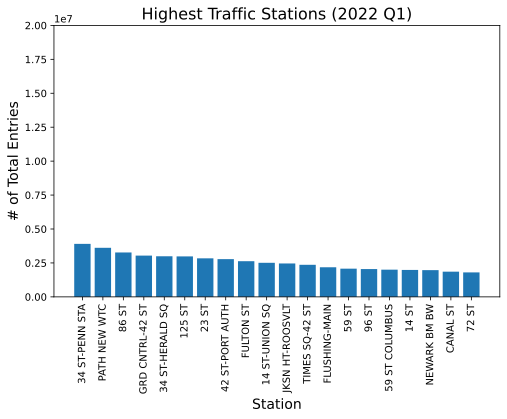

In [36]:
plt.figure(figsize=(8,5))
plt.bar(top_20_2022['STATION'], top_20_2022['Total_Q1_Entries'])
plt.ylabel('# of Total Entries',fontsize=14)
plt.xlabel('Station',fontsize=14)
plt.xticks(rotation=90)
plt.ylim(0,20000000)
plt.title('Highest Traffic Stations (2022 Q1)',fontsize=16)

In [37]:
least_20_2022=station_totals.tail(20)

Text(0.5, 1.0, 'Lowest Traffic Stations (2022 Q1)')

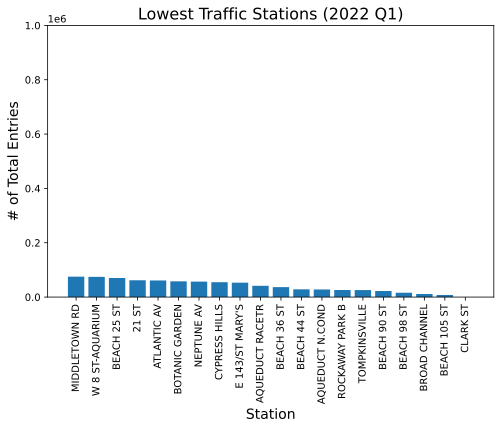

In [38]:
plt.figure(figsize=(8,5))
plt.bar(least_20_2022['STATION'], least_20_2022['Total_Q1_Entries'])
plt.ylabel('# of Total Entries',fontsize=14)
plt.xlabel('Station',fontsize=14)
plt.xticks(rotation=90)
plt.ylim(0,1000000)                                    #y-axis range is different from the highest traffic graph
plt.title('Lowest Traffic Stations (2022 Q1)',fontsize=16)

# Further Study on stations

In [39]:
 station_totals.head(20)

,STATION,Total_Q1_Entries
0,34 ST-PENN STA,3904679.0
1,PATH NEW WTC,3615416.0
2,86 ST,3271159.0
3,GRD CNTRL-42 ST,3040776.0
4,34 ST-HERALD SQ,2993329.0
5,125 ST,2979248.0
6,23 ST,2841462.0
7,42 ST-PORT AUTH,2780576.0
8,FULTON ST,2627232.0
9,14 ST-UNION SQ,2512050.0


##  Station Ridership Distribution Over 2022 Q1

In [40]:
station_totals["Total_Q1_Entries"].sum()

193262892.0

In [41]:
station_totals['Ridership_Share']=(
    station_totals['Total_Q1_Entries'].apply(lambda x: x/202180102*100))
station_totals

,STATION,Total_Q1_Entries,Ridership_Share
0,34 ST-PENN STA,3904679.0,1.931287e+00
1,PATH NEW WTC,3615416.0,1.788216e+00
2,86 ST,3271159.0,1.617943e+00
3,GRD CNTRL-42 ST,3040776.0,1.503994e+00
4,34 ST-HERALD SQ,2993329.0,1.480526e+00
...,...,...,...
373,BEACH 90 ST,22430.0,1.109407e-02
374,BEACH 98 ST,16095.0,7.960724e-03
375,BROAD CHANNEL,11285.0,5.581657e-03
376,BEACH 105 ST,7642.0,3.779798e-03


In [150]:
station_totals['Ridership_million']=(
    station_totals['Total_Q1_Entries'].apply(lambda x: x/1000000))
station_totals.head(55)

,STATION,Total_Q1_Entries,Ridership_Share,CUM_SHARE,Ridership_million
0,34 ST-PENN STA,3904679.0,1.931287,1.931287,3.904679
1,PATH NEW WTC,3615416.0,1.788216,3.719503,3.615416
2,86 ST,3271159.0,1.617943,5.337446,3.271159
3,GRD CNTRL-42 ST,3040776.0,1.503994,6.841440,3.040776
4,34 ST-HERALD SQ,2993329.0,1.480526,8.321966,2.993329
5,125 ST,2979248.0,1.473561,9.795527,2.979248
6,23 ST,2841462.0,1.405411,11.200939,2.841462
7,42 ST-PORT AUTH,2780576.0,1.375297,12.576235,2.780576
8,FULTON ST,2627232.0,1.299451,13.875686,2.627232
9,14 ST-UNION SQ,2512050.0,1.242481,15.118168,2.512050


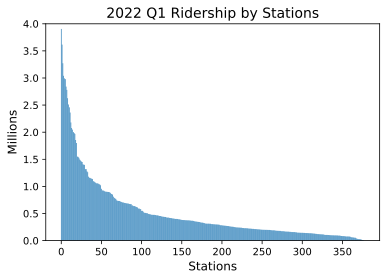

In [86]:
indices = range(len(station_totals["STATION"]))
plt.bar(indices, station_totals["Ridership_million"])
plt.ylim(0,4)                              
plt.title('2022 Q1 Ridership by Stations',fontsize=14)
plt.xlabel('Stations',fontsize=12)
plt.ylabel("Millions",fontsize=12)
plt.savefig('2022 Q1 Ridership by Stations',dpi=300, bbox_inches="tight")
plt.show()


In [87]:
station_totals['CUM_SHARE'] = station_totals['Ridership_Share'].cumsum()

In [88]:
station_totals.head()

,STATION,Total_Q1_Entries,Ridership_Share,CUM_SHARE,Ridership_million
0,34 ST-PENN STA,3904679.0,1.931287,1.931287,3.904679
1,PATH NEW WTC,3615416.0,1.788216,3.719503,3.615416
2,86 ST,3271159.0,1.617943,5.337446,3.271159
3,GRD CNTRL-42 ST,3040776.0,1.503994,6.841440,3.040776
4,34 ST-HERALD SQ,2993329.0,1.480526,8.321966,2.993329


##  Ridership Share of Stations
### From the above table, we can see that the top 20 stations (5% of # of stations) take up 27% of the total ridership.
### Top 55 stations(15% of # of stations) take up the half of the total ridership.
### And the rest 323 stations(85% of # of stations) take up the rest half of the ridership. 


# What is the best way to visualize this????

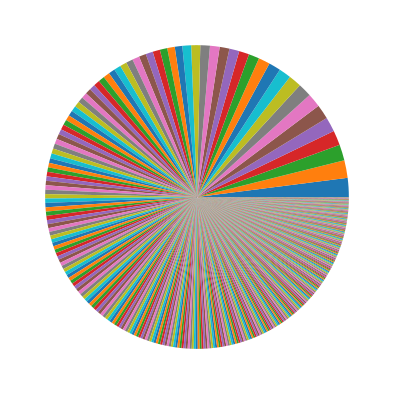

In [92]:
plt.figure(figsize=(10,7))

plt.pie(station_totals["Ridership_Share"])


plt.savefig('2022 Q1 Ridership by Stations_pie',dpi=300)


plt.show()

## Weekly Pattern

In [46]:
import numpy as np

In [47]:
station_daily

,STATION,DATE,DAILY_ENTRIES
0,1 AV,01/02/2022,3701.0
1,1 AV,01/03/2022,6844.0
2,1 AV,01/04/2022,7041.0
3,1 AV,01/05/2022,7354.0
4,1 AV,01/06/2022,7601.0
...,...,...,...
33979,ZEREGA AV,03/28/2022,1309.0
33980,ZEREGA AV,03/29/2022,1412.0
33981,ZEREGA AV,03/30/2022,1414.0
33982,ZEREGA AV,03/31/2022,1426.0


In [48]:
station_daily['Total_Q_Entries']=station_daily.groupby(["STATION"])['DAILY_ENTRIES'].transform(lambda x:x.sum())
station_daily.sort_values(["Total_Q_Entries","DATE"], ascending=[False,True],inplace=True)
station_daily

,STATION,DATE,DAILY_ENTRIES,Total_Q_Entries
5489,34 ST-PENN STA,01/02/2022,23669.0,3904679.0
5490,34 ST-PENN STA,01/03/2022,39482.0,3904679.0
5491,34 ST-PENN STA,01/04/2022,42721.0,3904679.0
5492,34 ST-PENN STA,01/05/2022,40982.0,3904679.0
5493,34 ST-PENN STA,01/06/2022,42346.0,3904679.0
...,...,...,...,...
16792,CLARK ST,03/28/2022,0.0,2.0
16793,CLARK ST,03/29/2022,0.0,2.0
16794,CLARK ST,03/30/2022,0.0,2.0
16795,CLARK ST,03/31/2022,0.0,2.0


In [49]:
station_daily['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily['DATE']).dt.dayofweek
station_daily['WEEK_OF_YEAR'] = pd.to_datetime(station_daily['DATE']).dt.week
station_daily['MONTH_OF_YEAR'] = pd.to_datetime(station_daily['DATE']).dt.month

station_daily=station_daily[
    (station_daily["WEEK_OF_YEAR"]!=52)&(station_daily["MONTH_OF_YEAR"]!=4)
]
station_daily

/var/folders/4q/s5vk58v95472hjx15zb8y_940000gn/T/ipykernel_12408/686544772.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  station_daily['WEEK_OF_YEAR'] = pd.to_datetime(station_daily['DATE']).dt.week


,STATION,DATE,DAILY_ENTRIES,Total_Q_Entries,DAY_OF_WEEK_NUM,WEEK_OF_YEAR,MONTH_OF_YEAR
5490,34 ST-PENN STA,01/03/2022,39482.0,3904679.0,0,1,1
5491,34 ST-PENN STA,01/04/2022,42721.0,3904679.0,1,1,1
5492,34 ST-PENN STA,01/05/2022,40982.0,3904679.0,2,1,1
5493,34 ST-PENN STA,01/06/2022,42346.0,3904679.0,3,1,1
5494,34 ST-PENN STA,01/07/2022,35500.0,3904679.0,4,1,1
...,...,...,...,...,...,...,...
16791,CLARK ST,03/27/2022,1.0,2.0,6,12,3
16792,CLARK ST,03/28/2022,0.0,2.0,0,13,3
16793,CLARK ST,03/29/2022,0.0,2.0,1,13,3
16794,CLARK ST,03/30/2022,0.0,2.0,2,13,3


In [50]:
station_daily["MONTH_OF_YEAR"].unique()

array([1, 2, 3])

In [51]:
STATION_86ST=station_daily[station_daily["STATION"]=="86 ST"]
STATION_86ST

,STATION,DATE,DAILY_ENTRIES,Total_Q_Entries,DAY_OF_WEEK_NUM,WEEK_OF_YEAR,MONTH_OF_YEAR
9900,86 ST,01/03/2022,30558.0,3271159.0,0,1,1
9901,86 ST,01/04/2022,31802.0,3271159.0,1,1,1
9902,86 ST,01/05/2022,31104.0,3271159.0,2,1,1
9903,86 ST,01/06/2022,33903.0,3271159.0,3,1,1
9904,86 ST,01/07/2022,29667.0,3271159.0,4,1,1
...,...,...,...,...,...,...,...
9983,86 ST,03/27/2022,17957.0,3271159.0,6,12,3
9984,86 ST,03/28/2022,38534.0,3271159.0,0,13,3
9985,86 ST,03/29/2022,40836.0,3271159.0,1,13,3
9986,86 ST,03/30/2022,462352.0,3271159.0,2,13,3


In [52]:
STATION_86ST_Jan = STATION_86ST[(STATION_86ST['WEEK_OF_YEAR']==1)|
                                (STATION_86ST['WEEK_OF_YEAR']==2)|
                                (STATION_86ST['WEEK_OF_YEAR']==3)|
                                (STATION_86ST['WEEK_OF_YEAR']==4)
                               ] 
STATION_86ST_Jan

,STATION,DATE,DAILY_ENTRIES,Total_Q_Entries,DAY_OF_WEEK_NUM,WEEK_OF_YEAR,MONTH_OF_YEAR
9900,86 ST,01/03/2022,30558.0,3271159.0,0,1,1
9901,86 ST,01/04/2022,31802.0,3271159.0,1,1,1
9902,86 ST,01/05/2022,31104.0,3271159.0,2,1,1
9903,86 ST,01/06/2022,33903.0,3271159.0,3,1,1
9904,86 ST,01/07/2022,29667.0,3271159.0,4,1,1
9905,86 ST,01/08/2022,17987.0,3271159.0,5,1,1
9906,86 ST,01/09/2022,13606.0,3271159.0,6,1,1
9907,86 ST,01/10/2022,32835.0,3271159.0,0,2,1
9908,86 ST,01/11/2022,32301.0,3271159.0,1,2,1
9909,86 ST,01/12/2022,34120.0,3271159.0,2,2,1


In [53]:
STATION_86ST_Jan=STATION_86ST_Jan.iloc[:-1]
STATION_86ST_Jan

,STATION,DATE,DAILY_ENTRIES,Total_Q_Entries,DAY_OF_WEEK_NUM,WEEK_OF_YEAR,MONTH_OF_YEAR
9900,86 ST,01/03/2022,30558.0,3271159.0,0,1,1
9901,86 ST,01/04/2022,31802.0,3271159.0,1,1,1
9902,86 ST,01/05/2022,31104.0,3271159.0,2,1,1
9903,86 ST,01/06/2022,33903.0,3271159.0,3,1,1
9904,86 ST,01/07/2022,29667.0,3271159.0,4,1,1
9905,86 ST,01/08/2022,17987.0,3271159.0,5,1,1
9906,86 ST,01/09/2022,13606.0,3271159.0,6,1,1
9907,86 ST,01/10/2022,32835.0,3271159.0,0,2,1
9908,86 ST,01/11/2022,32301.0,3271159.0,1,2,1
9909,86 ST,01/12/2022,34120.0,3271159.0,2,2,1


Text(0.5, 1.0, 'Ridership Per Weekday of Station 86 ST Jan')

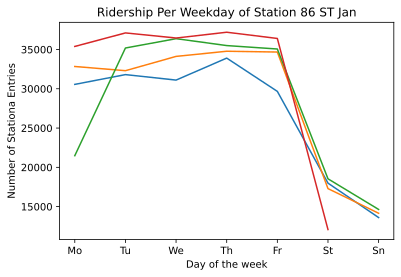

In [54]:
for i, group in STATION_86ST_Jan.groupby('WEEK_OF_YEAR'):
    plt.plot(group['DAY_OF_WEEK_NUM'], group['DAILY_ENTRIES'])
    
plt.xlabel('Day of the week')
plt.ylabel('Number of Stationa Entries')
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
plt.title('Ridership Per Weekday of Station 86 ST Jan')

In [55]:
STATION_86ST_Mar = STATION_86ST[(STATION_86ST['WEEK_OF_YEAR']==9)|
                                (STATION_86ST['WEEK_OF_YEAR']==10)|
                                (STATION_86ST['WEEK_OF_YEAR']==11)|
                                (STATION_86ST['WEEK_OF_YEAR']==12)
                               ] 
STATION_86ST_Mar

,STATION,DATE,DAILY_ENTRIES,Total_Q_Entries,DAY_OF_WEEK_NUM,WEEK_OF_YEAR,MONTH_OF_YEAR
9956,86 ST,02/28/2022,38462.0,3271159.0,0,9,2
9957,86 ST,03/01/2022,41000.0,3271159.0,1,9,3
9958,86 ST,03/02/2022,40857.0,3271159.0,2,9,3
9959,86 ST,03/03/2022,41131.0,3271159.0,3,9,3
9960,86 ST,03/04/2022,40425.0,3271159.0,4,9,3
9961,86 ST,03/05/2022,27622.0,3271159.0,5,9,3
9962,86 ST,03/06/2022,17351.0,3271159.0,6,9,3
9963,86 ST,03/07/2022,38335.0,3271159.0,0,10,3
9964,86 ST,03/08/2022,41649.0,3271159.0,1,10,3
9965,86 ST,03/09/2022,39466.0,3271159.0,2,10,3


Text(0.5, 1.0, 'Ridership Per Weekday of Station 86 ST in March 2022')

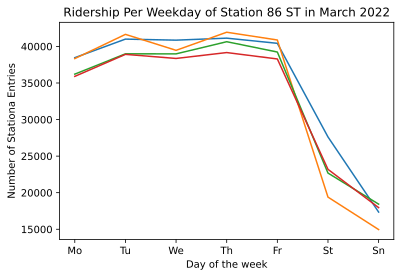

In [56]:
for i, group in STATION_86ST_Mar.groupby('WEEK_OF_YEAR'):
    plt.plot(group['DAY_OF_WEEK_NUM'], group['DAILY_ENTRIES'])
    
plt.xlabel('Day of the week')
plt.ylabel('Number of Stationa Entries')
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
plt.title('Ridership Per Weekday of Station 86 ST in March 2022')

In [57]:
MIDDLETOWN_RD=station_daily[station_daily["STATION"]=="MIDDLETOWN RD"]
MIDDLETOWN_RD

,STATION,DATE,DAILY_ENTRIES,Total_Q_Entries,DAY_OF_WEEK_NUM,WEEK_OF_YEAR,MONTH_OF_YEAR
25166,MIDDLETOWN RD,01/03/2022,815.0,75080.0,0,1,1
25167,MIDDLETOWN RD,01/04/2022,827.0,75080.0,1,1,1
25168,MIDDLETOWN RD,01/05/2022,832.0,75080.0,2,1,1
25169,MIDDLETOWN RD,01/06/2022,908.0,75080.0,3,1,1
25170,MIDDLETOWN RD,01/07/2022,653.0,75080.0,4,1,1
...,...,...,...,...,...,...,...
25249,MIDDLETOWN RD,03/27/2022,305.0,75080.0,6,12,3
25250,MIDDLETOWN RD,03/28/2022,1082.0,75080.0,0,13,3
25251,MIDDLETOWN RD,03/29/2022,1166.0,75080.0,1,13,3
25252,MIDDLETOWN RD,03/30/2022,1144.0,75080.0,2,13,3


In [58]:
MIDDLETOWN_RD_Jan=MIDDLETOWN_RD[(MIDDLETOWN_RD['WEEK_OF_YEAR']==1)|
                                (MIDDLETOWN_RD['WEEK_OF_YEAR']==2)|
                                (MIDDLETOWN_RD['WEEK_OF_YEAR']==3)|
                                (MIDDLETOWN_RD['WEEK_OF_YEAR']==4)
                               ] 
MIDDLETOWN_RD_Jan

,STATION,DATE,DAILY_ENTRIES,Total_Q_Entries,DAY_OF_WEEK_NUM,WEEK_OF_YEAR,MONTH_OF_YEAR
25166,MIDDLETOWN RD,01/03/2022,815.0,75080.0,0,1,1
25167,MIDDLETOWN RD,01/04/2022,827.0,75080.0,1,1,1
25168,MIDDLETOWN RD,01/05/2022,832.0,75080.0,2,1,1
25169,MIDDLETOWN RD,01/06/2022,908.0,75080.0,3,1,1
25170,MIDDLETOWN RD,01/07/2022,653.0,75080.0,4,1,1
25171,MIDDLETOWN RD,01/08/2022,329.0,75080.0,5,1,1
25172,MIDDLETOWN RD,01/09/2022,241.0,75080.0,6,1,1
25173,MIDDLETOWN RD,01/10/2022,866.0,75080.0,0,2,1
25174,MIDDLETOWN RD,01/11/2022,821.0,75080.0,1,2,1
25175,MIDDLETOWN RD,01/12/2022,899.0,75080.0,2,2,1


Text(0.5, 1.0, 'Ridership Per Weekday of Station MIDDLETOWN RD in Jan 2022')

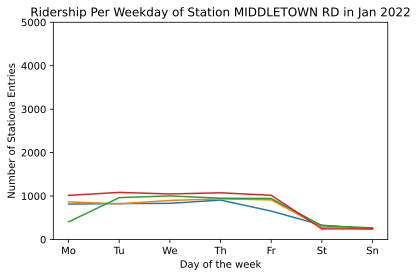

In [59]:
for i, group in MIDDLETOWN_RD_Jan.groupby('WEEK_OF_YEAR'):
    plt.plot(group['DAY_OF_WEEK_NUM'], group['DAILY_ENTRIES'])
    
plt.xlabel('Day of the week')
plt.ylabel('Number of Stationa Entries')
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
plt.ylim(0,5000)                              
plt.title('Ridership Per Weekday of Station MIDDLETOWN RD in Jan 2022')

In [60]:
MIDDLETOWN_RD_Mar=MIDDLETOWN_RD[(MIDDLETOWN_RD['WEEK_OF_YEAR']==9)|
                                (MIDDLETOWN_RD['WEEK_OF_YEAR']==10)|
                                (MIDDLETOWN_RD['WEEK_OF_YEAR']==11)|
                                (MIDDLETOWN_RD['WEEK_OF_YEAR']==12)
                               ] 
MIDDLETOWN_RD_Mar.shape

(28, 7)

Text(0.5, 1.0, 'Ridership Per Weekday of Station MIDDLETOWN RD in March 2022')

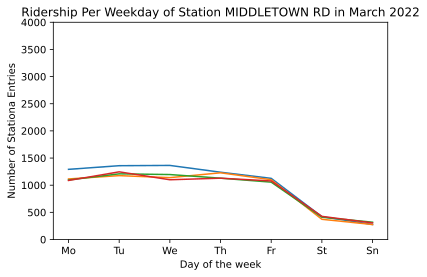

In [61]:
for i, group in MIDDLETOWN_RD_Mar.groupby('WEEK_OF_YEAR'):
    plt.plot(group['DAY_OF_WEEK_NUM'], group['DAILY_ENTRIES'])
    
plt.xlabel('Day of the week')
plt.ylabel('Number of Stationa Entries')
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
plt.ylim(0,4000)                              

plt.title('Ridership Per Weekday of Station MIDDLETOWN RD in March 2022')

In [62]:
station_daily

,STATION,DATE,DAILY_ENTRIES,Total_Q_Entries,DAY_OF_WEEK_NUM,WEEK_OF_YEAR,MONTH_OF_YEAR
5490,34 ST-PENN STA,01/03/2022,39482.0,3904679.0,0,1,1
5491,34 ST-PENN STA,01/04/2022,42721.0,3904679.0,1,1,1
5492,34 ST-PENN STA,01/05/2022,40982.0,3904679.0,2,1,1
5493,34 ST-PENN STA,01/06/2022,42346.0,3904679.0,3,1,1
5494,34 ST-PENN STA,01/07/2022,35500.0,3904679.0,4,1,1
...,...,...,...,...,...,...,...
16791,CLARK ST,03/27/2022,1.0,2.0,6,12,3
16792,CLARK ST,03/28/2022,0.0,2.0,0,13,3
16793,CLARK ST,03/29/2022,0.0,2.0,1,13,3
16794,CLARK ST,03/30/2022,0.0,2.0,2,13,3


In [109]:
station_daily.groupby("STATION")["DAY_OF_WEEK_NUM"].count()

STATION
1 AV               88
103 ST             88
103 ST-CORONA      88
104 ST             88
110 ST             88
                   ..
WOODLAWN           88
WORLD TRADE CTR    88
WTC-CORTLANDT      88
YORK ST            88
ZEREGA AV          88
Name: DAY_OF_WEEK_NUM, Length: 378, dtype: int64

In [113]:
Ridership_Weekdays=(
    station_daily.groupby("DAY_OF_WEEK_NUM")
    .agg({"DAILY_ENTRIES":"sum"}).reset_index()).rename(columns={"DAILY_ENTRIES":"Q1_Total"})
Ridership_Weekdays["Average"]= Ridership_Weekdays["Q1_Total"].apply(lambda x: x/12)
Ridership_Weekdays["Avg_Entries_million"]=Ridership_Weekdays["Average"].apply(lambda x: x/1000000)
Ridership_Weekdays                                                       

,DAY_OF_WEEK_NUM,Q1_Total,Average,Avg_Entries_million
0,0,29048163.0,2.420680e+06,2.420680
1,1,33496569.0,2.791381e+06,2.791381
2,2,33454395.0,2.787866e+06,2.787866
3,3,34764983.0,2.897082e+06,2.897082
4,4,29150202.0,2.429184e+06,2.429184
5,5,17413315.0,1.451110e+06,1.451110
6,6,12509953.0,1.042496e+06,1.042496


/Users/Layla/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


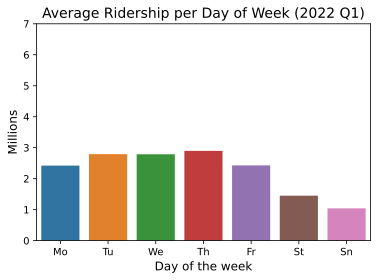

In [142]:
sns.barplot(Ridership_Weekdays["DAY_OF_WEEK_NUM"],Ridership_Weekdays["Avg_Entries_million"])
    
plt.xlabel('Day of the week',fontsize=12)
plt.ylabel('Millions', fontsize=12)
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
         #add yrange
plt.ylim(0,7)
plt.title('Average Ridership per Day of Week (2022 Q1)',fontsize=14)
plt.savefig('Average Ridership per DayofWeek (2022 Q1)',dpi=300)
plt.show()


## Work from home and hybrid may help explain this

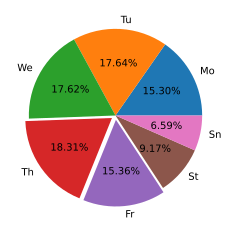

In [141]:
plt.pie(Ridership_Weekdays["Avg_Entries_million"], labels=['Mo','Tu','We','Th','Fr','St','Sn'],
        explode = (0, 0, 0, 0.05,0.05,0,0), autopct='%1.2f%%')
#plt.title('Ridership Share by Day of Week (2022 Q1)')
plt.savefig('Ridership Share by Day of Week (2022 Q1)',dpi=300)
plt.show()



## Monthly trend

In [69]:
station_daily

,STATION,DATE,DAILY_ENTRIES,Total_Q_Entries,DAY_OF_WEEK_NUM,WEEK_OF_YEAR,MONTH_OF_YEAR
5490,34 ST-PENN STA,01/03/2022,39482.0,3904679.0,0,1,1
5491,34 ST-PENN STA,01/04/2022,42721.0,3904679.0,1,1,1
5492,34 ST-PENN STA,01/05/2022,40982.0,3904679.0,2,1,1
5493,34 ST-PENN STA,01/06/2022,42346.0,3904679.0,3,1,1
5494,34 ST-PENN STA,01/07/2022,35500.0,3904679.0,4,1,1
...,...,...,...,...,...,...,...
16791,CLARK ST,03/27/2022,1.0,2.0,6,12,3
16792,CLARK ST,03/28/2022,0.0,2.0,0,13,3
16793,CLARK ST,03/29/2022,0.0,2.0,1,13,3
16794,CLARK ST,03/30/2022,0.0,2.0,2,13,3


In [70]:
station_daily["WEEK_OF_YEAR"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [71]:
Monthly=station_daily.groupby(["MONTH_OF_YEAR"])['DAILY_ENTRIES'].sum().reset_index().rename(columns={"DAILY_ENTRIES":"MONTHLY_ENTRIES"})
Monthly

,MONTH_OF_YEAR,MONTHLY_ENTRIES
0,1,56176760.0
1,2,59989553.0
2,3,73671267.0


/Users/Layla/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 210000000.0)

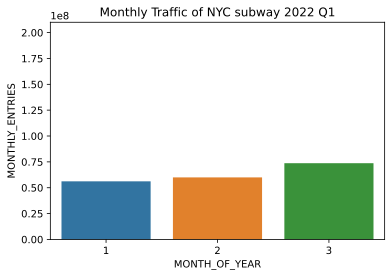

In [72]:
sns.barplot(Monthly['MONTH_OF_YEAR'], Monthly["MONTHLY_ENTRIES"])
plt.title("Monthly Traffic of NYC subway 2022 Q1")
plt.ylim(0,210000000)

In [73]:
Q1_sum=Monthly["MONTHLY_ENTRIES"].sum()
Q1_sum

189837580.0